<a href="https://colab.research.google.com/github/marofmar/CVND/blob/master/CVND_L4_HSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grid Image

Image dimensions:  (1024, 1024, 3)
186
Max:  255
Min:  0


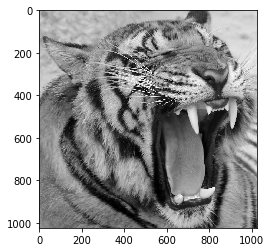

In [4]:
import numpy as np 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import cv2

image = mpimg.imread('tigre.jpg') 
print('Image dimensions: ', image.shape)

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # change from color to greyscale 
plt.imshow(gray_image, cmap = 'gray') 

x = 400 
y = 300 
print(gray_image[y, x])

max_val = np.amax(gray_image) 
min_val = np.amin(gray_image) 
print('Max: ', max_val) 
print('Min: ', min_val)



In [0]:
%matplotlib inline

# RGB split

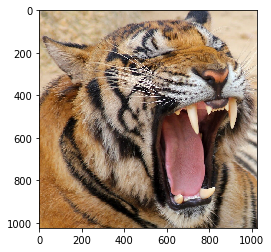

In [6]:
rgb_image = mpimg.imread('tigre.jpg')
plt.imshow(image) 

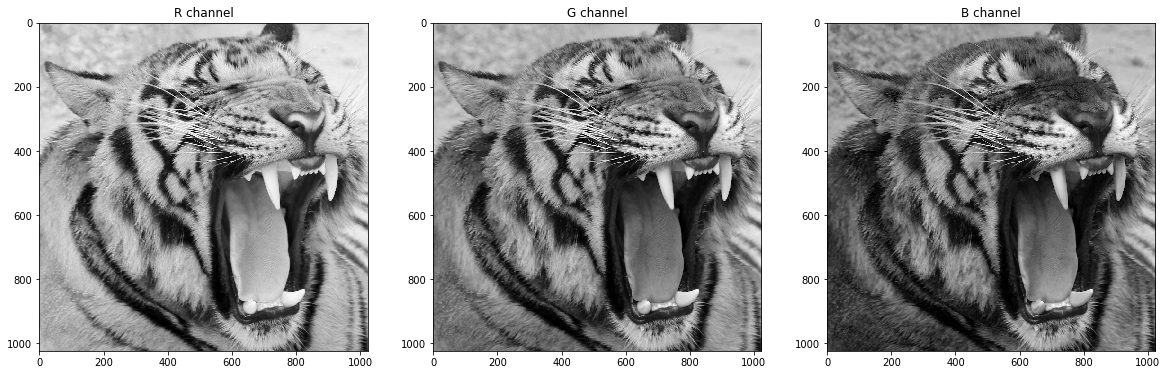

In [8]:
r = rgb_image[:, :, 0]
g = rgb_image[:, :, 1]
b = rgb_image[:, :, 2] 

#visualize individual color channel 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10)) 
ax1.set_title('R channel') 
ax1.imshow(r, cmap = 'gray') 
ax2.set_title('G channel') 
ax2.imshow(g, cmap = 'gray') 
ax3.set_title('B channel') 
ax3.imshow(b, cmap = 'gray') 

# Coding a Blue Screen

In [0]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
%matplotlib inline

In [12]:
pizza = cv2.imread('pizza_bluescreen.jpg')
print("This image is: ", type(image), ' with dimensions: ', image.shape)

This image is:  <class 'numpy.ndarray'>  with dimensions:  (1024, 1024, 3)


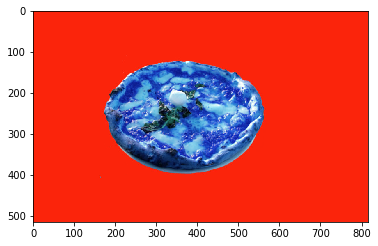

In [14]:
plt.imshow(pizza) # opencv read in not RGB way but BGR way

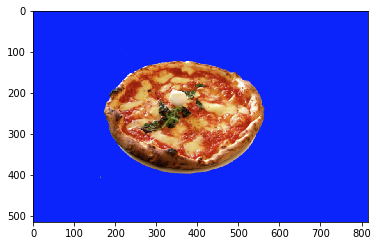

In [16]:
image_copy = np.copy(pizza) # it is always safe to copy one 
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB) 
plt.imshow(image_copy)

# Let's make the pizza float in galaxy!
## Color threshold, blue screen

In [0]:
# define the color threshold (in this case, blue background) 
lower_blue = np.array([0,0,220])
upper_blue = np.array([50,50,255]) 


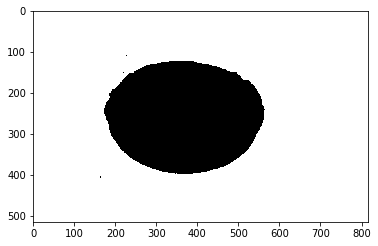

In [20]:
# define the masked area 
mask = cv2.inRange(image_copy, lower_blue, upper_blue) 
# visualiza the mask 
plt.imshow(mask, cmap = 'gray') 

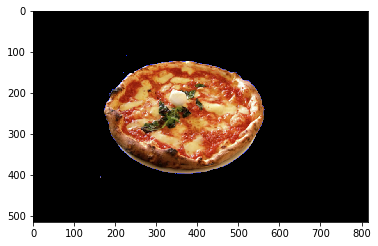

In [21]:
masked_image = np.copy(image_copy) 
masked_image[mask != 0] = [0,0,0]
plt.imshow(masked_image)

In [27]:
wid, height = image_copy.shape[:2]
print(wid, height)

514 816


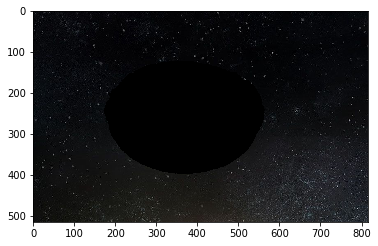

In [28]:
background_image = cv2.imread('galaxy.jpg') 
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB) 
crop_background = background_image[0:514, 0:816]
crop_background[mask==0] = [0,0,0]
plt.imshow(crop_background)

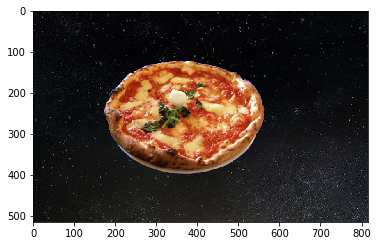

In [29]:
new = masked_image + crop_background
plt.imshow(new)

# HSV Color Space, Balloons

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

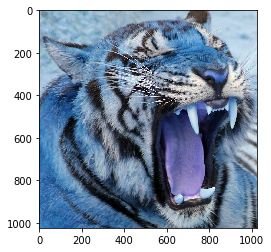

In [44]:
%matplotlib inline 
ball = cv2.imread('tigre.jpg') 
plt.imshow(ball)

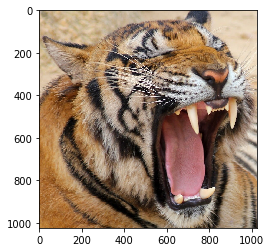

In [45]:

# change color to RGB (from BGR) 
tongue = cv2.cvtColor(ball, cv2.COLOR_BGR2RGB) 
plt.imshow(tongue)

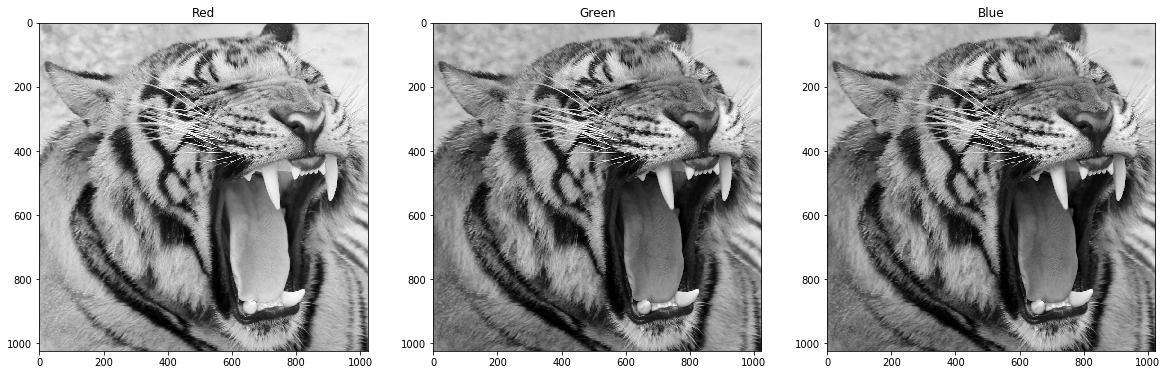

In [46]:
r = tongue[:,:,0]
g = tongue[:,:,1]
b = tongue[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10)) 

ax1.set_title('Red')
ax1.imshow(r, cmap = 'gray')

ax2.set_title('Green')
ax2.imshow(g, cmap = 'gray')

ax3.set_title('Blue')
ax3.imshow(g, cmap ='gray') 

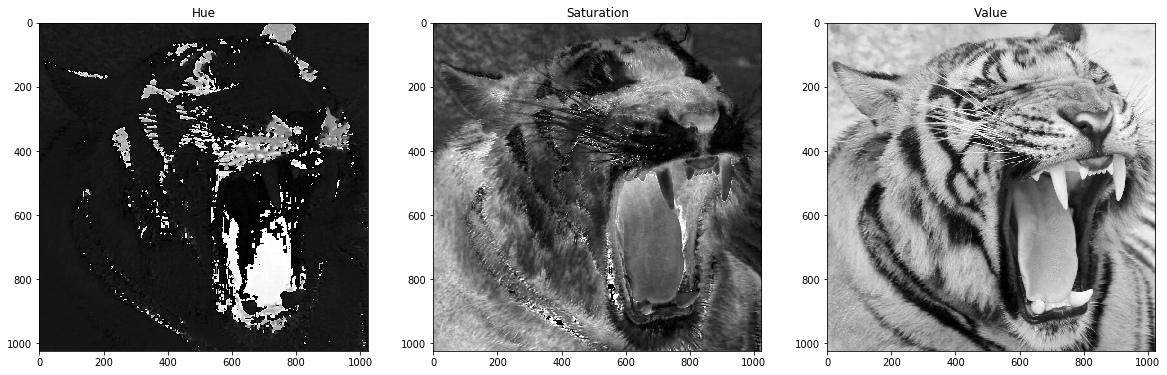

In [49]:
# convert from RGB to HSV 
hsv = cv2.cvtColor(tongue, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10)) 

ax1.set_title('Hue')
ax1.imshow(h, cmap = 'gray') 

ax2.set_title('Saturation') 
ax2.imshow(s, cmap = 'gray') 

ax3.set_title('Value') 
ax3.imshow(v, cmap = 'gray')

In [0]:
# define our color selection criteria in RGB value 
lower_pink = np.array([180,0,100])
upper_pink = np.array([255,255,230])

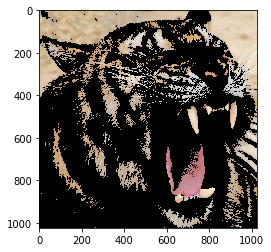

In [52]:
# mask the image
mask_rgb = cv2.inRange(tongue, lower_pink, upper_pink) 
masked_image = np.copy(tongue) 
masked_image[mask_rgb==0] = [0,0,0]

plt.imshow(masked_image)

In [0]:
lower_hue = np.array([160,0,0])
upper_hue = np.array([180, 255,255])

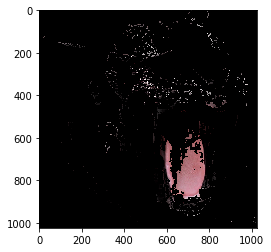

In [55]:
# try HSV
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

masked_image = np.copy(tongue) 
masked_image[mask_hsv==0] = [0,0,0]

plt.imshow(masked_image)